In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
mnist=tfds.load('mnist',split=
                tfds.Split.TRAIN)

In [3]:
mnist_numpy=tfds.as_numpy(mnist)
mnist_list=list(mnist_numpy)

In [4]:
x_data,y_data=[],[]
for example in mnist_list:
    x_data.append(example['image'])
    y_data.append(example['label'])
x_train=np.asarray(x_data,dtype=np.float64)
y_train=np.asarray(y_data,dtype=np.int32)
y_train=tf.one_hot(y_train,depth=10,dtype=tf.float32)
y_train=tfds.as_numpy(y_train)

In [5]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
sample=np.reshape(x_train[230],newshape=(28,28))

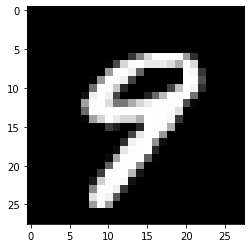

In [7]:
plt.imshow(sample,cmap='gray')

In [8]:
def init_weights(shape):
    init_weights_vals=tf.compat.v1.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_weights_vals)

In [9]:
def init_bias(shape):
    init_bias_vals=tf.constant(0.1,dtype=tf.float32,shape=shape)
    return tf.Variable(init_bias_vals)

In [10]:
def con2d(x,w):
    return tf.nn.conv2d(input=x,filters=w,strides=[1,1,1,1],padding='SAME')
    

In [11]:
def convolution_layer(input_data,shape):
    weight=init_weights(shape)
    bias=init_bias([shape[3]])
    return tf.nn.relu(con2d(input_data,weight)+bias)

In [12]:
def max_pool2by2(input_data):
    return tf.nn.max_pool(input_data,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [13]:
def normal_full_layer(input_data,size):
    input_size=int(input_data.get_shape()[1])
    weights=init_weights([input_size,size])
    bias=init_bias([size])
    return tf.matmul(input_data,weights)+bias

In [14]:
tf.compat.v1.disable_eager_execution()

In [29]:
init=tf.compat.v1.global_variables_initializer()

In [16]:
x=tf.compat.v1.placeholder(tf.float32,shape=[None,728])
y_true=tf.compat.v1.placeholder(tf.float32,shape=[None,10])

In [17]:
hold_prob=tf.compat.v1.placeholder(tf.float32)

In [18]:
x_image=tf.reshape(x,[-1,28,28,1])
x_image=tf.cast(x_image,dtype=tf.float32)

In [19]:
convo_1=convolution_layer(x_image,shape=[5,5,1,32])
convo_1_pooling=max_pool2by2(convo_1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
convo_2=convolution_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling=max_pool2by2(convo_2)

In [21]:
convo_2_flatten=tf.reshape(convo_2_pooling,shape=[-1,7*7*64])
fully_connect=tf.nn.relu(normal_full_layer(convo_2_flatten,1024))

In [22]:
full_drop_out=tf.nn.dropout(fully_connect,rate=0.5)
y_pred=normal_full_layer(full_drop_out,10)

In [23]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [24]:
optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
train=optimizer.minimize(cross_entropy)

In [25]:
mnist_test=tfds.load('mnist',split=tfds.Split.TEST)
mnist_test_numpy=tfds.as_numpy(mnist_test)
mnist_test_list=list(mnist_test_numpy)

In [26]:

x_data,y_data=[],[]
for example in mnist_test_list:
    x_data.append(example['image'])
    y_data.append(example['label'])
x_test=np.asarray(x_data,dtype=np.float32)
y_test=np.asarray(y_data,dtype=np.int32)
y_test=tf.one_hot(y_test,depth=10,dtype=tf.float32)
y_test=tfds.as_numpy(y_test)


NameError: name 'rand_int' is not defined

In [30]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    batch=50
    for i in range(batch):
        rand_int=np.random.randint(len(x_train),size=50)
        
        sess.run(train,feed_dict={x_image:x_train[rand_int],y_true:y_train[rand_int],hold_prob:0.5})
        
        if i%5==0:
            print("step:{}".format(i))
            print('Accuracy: ')
            matches=tf.equal(tf.argmax(y_true,1),tf.argmax(y_pred,1))
            acc=tf.reduce_mean(tf.cast(matches,tf.float32))
            
            print(sess.run(acc,feed_dict={x_image:x_test,y_true:y_test,hold_prob:1.0}))
            

step:0
Accuracy: 
0.1514
step:5
Accuracy: 
0.2208
step:10
Accuracy: 
0.2162
step:15
Accuracy: 
0.1126
step:20
Accuracy: 
0.0975
step:25
Accuracy: 
0.1016
step:30
Accuracy: 
0.1049
step:35
Accuracy: 
0.106
step:40
Accuracy: 
0.0995
step:45
Accuracy: 
0.0987
